In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    #no need to write plt.show()

UsageError: unrecognized arguments: #no need to write plt.show()


In [5]:
df=pd.read_csv('winequality-white.csv',sep=';')

In [6]:
df.head()
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [7]:
df.shape

(4898, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
df.quality.unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [11]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [12]:
X=df.iloc[:,:-1]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


<Figure size 720x432 with 0 Axes>

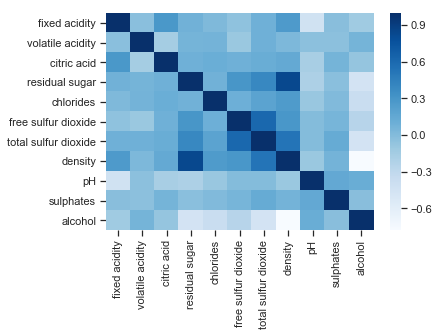

<Figure size 720x432 with 0 Axes>

In [63]:
sb.set(style="ticks", color_codes=True)
s =sb.heatmap(X.corr(),annot=False,cmap='Blues')
fig = s.get_figure()
fig.savefig("correlation.png")
plt.figure(figsize=(10,6))

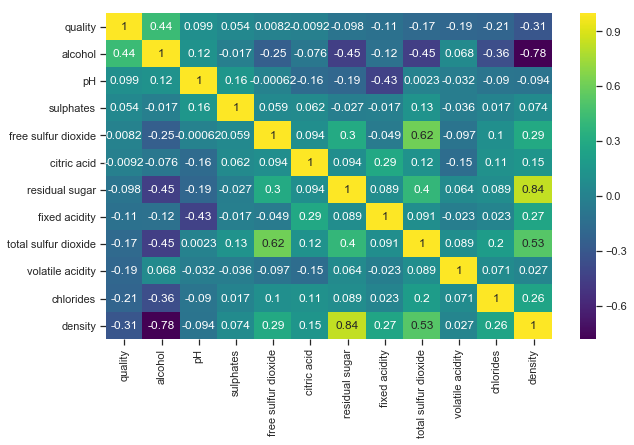

In [65]:
#Quality correlation matrix
k = 12 #number of variables for heatmap
cols = df.corr().nlargest(k, 'quality')['quality'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sb.heatmap(cm, annot=True, cmap = 'viridis')

In [24]:
#sb.pairplot(X)

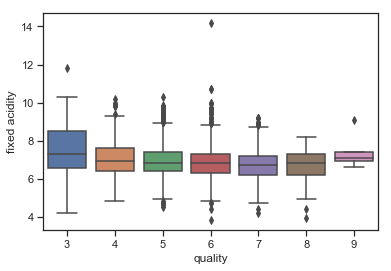

In [59]:
sb.boxplot(x='quality',y='fixed acidity',data=df,orient='v')

In [48]:
a=df.columns
list(a)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

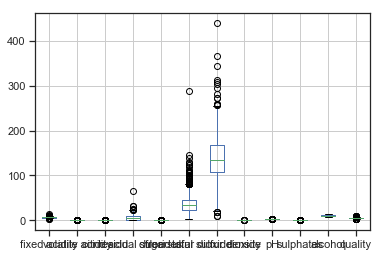

In [49]:
df.boxplot(column=list(a))

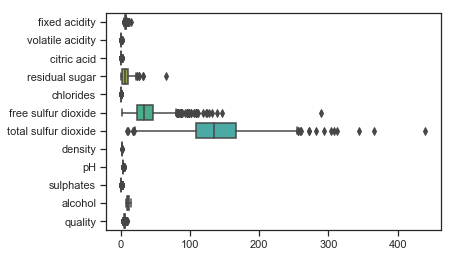

In [52]:
a=sb.boxplot(data=df,orient='h')
fig = a.get_figure()
fig.savefig("box.png")

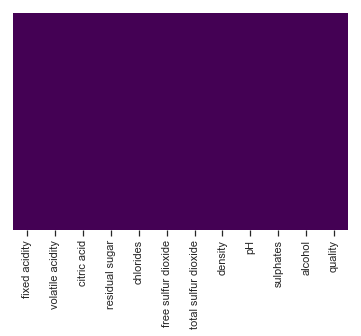

In [54]:
sb.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis') #missing values

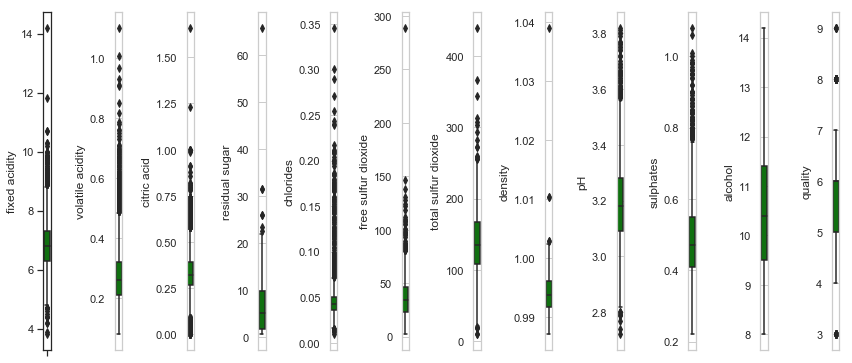

In [67]:
l = df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sb.set_style('whitegrid')
    sb.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

In [82]:
l = df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns


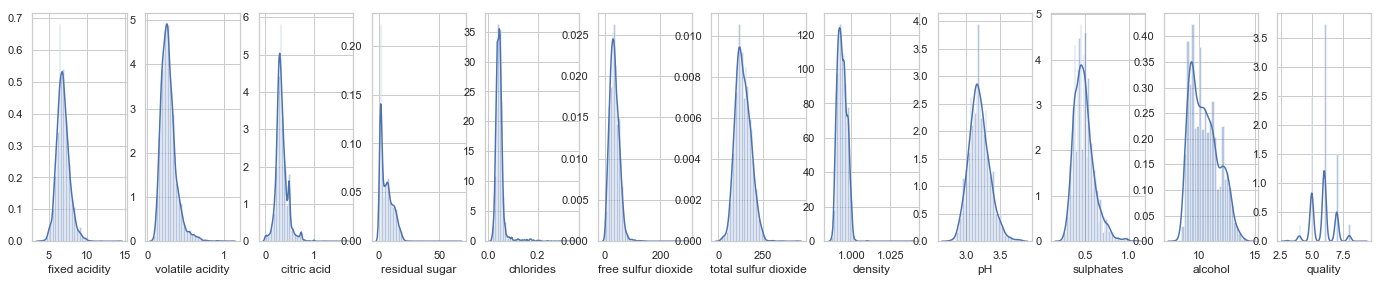

In [83]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sb.distplot(df[l[i]],kde=True) 

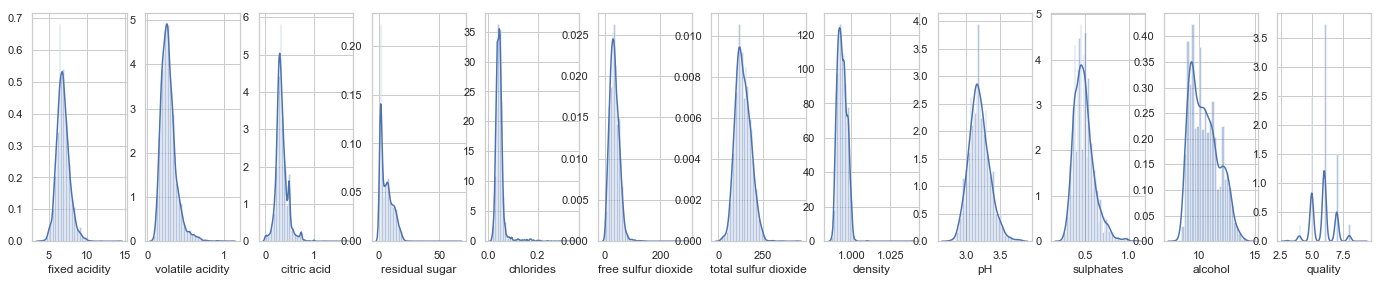

In [86]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,12):
    plt.subplot(number_of_rows + 1,12,i+1)
    sb.distplot(df.iloc[:,i],kde=True)
    

In [79]:
df.shape

(4898, 12)

In [81]:
l = df.columns.values
number_of_columns=12
number_of_rows = len(l)-1/number_of_columns
number_of_rows

11.916666666666666